# <h1><center><u> **Capstone Project 2024-25**</u></center></h1> #

###### <h1><center><u> Small Business Administration Loan Process</u> </center></h1> ######

In [314]:
# Import libraries 

import pyforest 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

<IPython.core.display.Javascript object>

In [315]:
# read dataset

df = pd.read_csv('SBAnational.csv')
df.head()

<IPython.core.display.Javascript object>

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [316]:
df.shape

(899164, 27)

In [317]:
# take random sample from whole data

df_sample = df.sample(frac=0.2,random_state=42)
df_sample.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
614156,6106063001,"UNION GRAND RENTAL STA., INC.",WEST SENECA,NY,14224,MANUFACTURERS & TRADERS TR CO,NY,0,10-Dec-93,1994,84,2,2.0,0,0,1,0,N,N,NaN,30-Apr-94,"$225,000.00",$0.00,P I F,$0.00,"$225,000.00","$191,250.00"
837937,8984934001,"POPE INDRUSTRIES, INC.",ATKINSON,NH,3811,"TD BANK, NATIONAL ASSOCIATION",DE,233320,14-Jul-05,2005,12,3,1.0,0,0,1,1,N,N,NaN,31-Mar-06,"$1,000,000.00",$0.00,P I F,$0.00,"$1,000,000.00","$750,000.00"
766128,8048893003,HARKINS INVEST SOLUTIONS INC,DUNCANSVILLE,PA,16646,FIRST COMMONWEALTH BANK,PA,0,3-Feb-95,1995,60,3,2.0,0,0,1,0,N,Y,NaN,30-Apr-95,"$30,800.00",$0.00,P I F,$0.00,"$30,800.00","$25,564.00"
414468,4005365002,"HENRIKSEN CONTRACTING, LLC.",GRIMES,IA,50111,FEDERAL DEPOSIT INSUR CORP,IL,238990,1-Apr-10,2010,120,15,1.0,16,15,0,2,N,N,NaN,1-Oct-10,"$235,000.00",$0.00,P I F,$0.00,"$235,000.00","$211,500.00"
214921,2518374005,J K TOOL & MACHINE INC,PHOENIX,AZ,85009,MERIDIAN BANK NATL ASSOC,AZ,444130,24-Nov-98,1999,60,3,1.0,0,0,1,0,0,N,NaN,31-Jan-99,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$37,500.00"


In [318]:
df_sample.shape

(179833, 27)

### Breakdown of the columns and what they represent<br>
**LoanNr_ChkDgt**: Loan number with a check digit.<br>
<br>
**Name**: Name of the borrower.<br>
<br>
**City**: City where the borrower is located.<br>
<br>
**State**: State where the borrower is located.<br>
<br>
**Zip**: Zip code of the borrower's location.<br>
<br>
**Bank**: Bank that issued the loan.<br>
<br>
**BankState**: State where the bank is located.<br>
<br>
**NAICS**: North American Industry Classification System code for the borrower's industry.<br>
<br>
**ApprovalDate**: Date the loan was approved.<br>
<br>
**ApprovalFY**: Fiscal year the loan was approved.<br>
<br>
**Term**: Loan term in months.<br>
<br>
**NoEmp**: Number of employees.<br>
<br>
**NewExist**: Whether the business is new (1) or existing (2).<br>
<br>
**CreateJob**: Number of jobs created with the loan.<br>
<br>
**RetainedJob**: Number of jobs retained with the loan.<br>
<br>
**FranchiseCode**: Whether the business is a franchise (1) or not (0).<br>
<br>
**UrbanRural**: Whether the location is urban (1) or rural (0).<br>
<br>
**RevLineCr**: Whether the loan is a revolving line of credit (Y) or not (N).<br>
<br>
**LowDoc**: Whether the loan is a low documentation loan (Y) or not (N).<br>
<br>
**ChgOffDate**: Date the loan was charged off, if applicable.<br>
<br>
**DisbursementDate**: Date the loan was disbursed.<br>
<br>
**DisbursementGross**: Amount disbursed.<br>
<br>
**BalanceGross**: Remaining balance of the loan.<br>
<br>
**MIS_Status**: Loan status (P I F means Paid in Full).<br>
<br>
**ChgOffPrinGr**: Charge-off principal gross amount.<br>
<br>
**GrAppv**: Gross amount approved.<br>
<br>
**SBA_Appv**: SBA-approved amount.<br>
<br>

In [319]:
# Missing value check

df_sample.isnull().sum()

LoanNr_ChkDgt             0
Name                      1
City                      4
State                     2
Zip                       0
Bank                    326
BankState               326
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                 28
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr               912
LowDoc                  516
ChgOffDate           147420
DisbursementDate        501
DisbursementGross         0
BalanceGross              0
MIS_Status              418
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [320]:
print('Dataset Information')
print(df_sample.info())

Dataset Information
<class 'pandas.core.frame.DataFrame'>
Index: 179833 entries, 614156 to 15414
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      179833 non-null  int64  
 1   Name               179832 non-null  object 
 2   City               179829 non-null  object 
 3   State              179831 non-null  object 
 4   Zip                179833 non-null  int64  
 5   Bank               179507 non-null  object 
 6   BankState          179507 non-null  object 
 7   NAICS              179833 non-null  int64  
 8   ApprovalDate       179833 non-null  object 
 9   ApprovalFY         179833 non-null  object 
 10  Term               179833 non-null  int64  
 11  NoEmp              179833 non-null  int64  
 12  NewExist           179805 non-null  float64
 13  CreateJob          179833 non-null  int64  
 14  RetainedJob        179833 non-null  int64  
 15  FranchiseCode      179833 non-nu

In [321]:
# Function to clean the 'ApprovalFY' column
def clean_year(year):
    if isinstance(year, str):  # Ensure the year is a string
        # Remove non-numeric characters
        cleaned_year = ''.join(filter(str.isdigit, year))
        return int(cleaned_year) if cleaned_year else None
    return year  # Return the year as is if it's already an integer

# Apply the cleaning function to the 'ApprovalFY' column
df_sample['ApprovalFY'] = df_sample['ApprovalFY'].apply(clean_year)

In [322]:
## consistency of date formats

date_columns = ['ApprovalDate','ChgOffDate', 'DisbursementDate']
for col in date_columns:
    if col in df_sample.columns:
        df_sample[col] = pd.to_datetime(df_sample[col])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [323]:
df_sample.dtypes

LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                           int64
Bank                         object
BankState                    object
NAICS                         int64
ApprovalDate         datetime64[ns]
ApprovalFY                    int64
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                    int64
RevLineCr                    object
LowDoc                       object
ChgOffDate           datetime64[ns]
DisbursementDate     datetime64[ns]
DisbursementGross            object
BalanceGross                 object
MIS_Status                   object
ChgOffPrinGr                 object
GrAppv                       object
SBA_Appv                     object
dtype: object

In [324]:
df_sample['NAICS'].value_counts()

NAICS
0         40428
722110     5556
722211     3850
811111     2897
621210     2877
          ...  
513340        1
922190        1
813940        1
111940        1
311213        1
Name: count, Length: 1242, dtype: int64

### Function for validity of NAICS code

In [325]:
def validate_naics(df_sample, column='NAICS'):

    # Convert to string and check if it follows the 6-digit format
    is_valid_naics = df_sample[column].astype(str).str.match(r'^\d{6}$')

    # Count valid and invalid NAICS codes
    valid_count = is_valid_naics.sum()
    invalid_count = (~is_valid_naics).sum()

    # Get sample of invalid NAICS values
    invalid_entries = df_sample.loc[~is_valid_naics, [column]].head()

    return {
        "valid_count": valid_count,
        "invalid_count": invalid_count,
        "invalid_samples": invalid_entries
    }

result = validate_naics(df_sample)
result

{'valid_count': 139405,
 'invalid_count': 40428,
 'invalid_samples':         NAICS
 614156      0
 766128      0
 824351      0
 667036      0
 805035      0}

# checking for inconsistent values

In [326]:
# columns 'GrAppv','SBA_Appv','ChgOffPrinGr','DisbursementGross','BalanceGross'

df_sample[['GrAppv','SBA_Appv','ChgOffPrinGr','DisbursementGross','BalanceGross']].value_counts()

GrAppv        SBA_Appv      ChgOffPrinGr  DisbursementGross  BalanceGross
$50,000.00    $25,000.00    $0.00         $50,000.00         $0.00           3484
$25,000.00    $12,500.00    $0.00         $25,000.00         $0.00           2465
$10,000.00    $5,000.00     $0.00         $10,000.00         $0.00           2183
$100,000.00   $80,000.00    $0.00         $100,000.00        $0.00           1881
              $50,000.00    $0.00         $100,000.00        $0.00           1665
                                                                             ... 
$209,000.00   $209,000.00   $0.00         $206,000.00        $0.00              1
$209,300.00   $156,975.00   $0.00         $209,300.00        $0.00              1
                            $119,209.00   $209,300.00        $0.00              1
$209,484.00   $157,113.00   $0.00         $209,484.00        $0.00              1
$999,900.00   $749,925.00   $0.00         $999,900.00        $0.00              1
Name: count, Length: 745

In [327]:
columns_to_remove = ['GrAppv', 'SBA_Appv', 'ChgOffPrinGr', 'DisbursementGross', 'BalanceGross']

def clean_column(df_sample, column_name):
    df_sample[column_name] = df_sample[column_name].str.replace('$', '').str.replace(',', '').astype(float)
    return df_sample

def clean_columns(df_sample, columns):
    for column in columns:
        df_sample = clean_column(df_sample, column)
    return df_sample

df_sample = clean_columns(df_sample, columns_to_remove)

In [328]:
df_sample[['GrAppv','SBA_Appv','ChgOffPrinGr','DisbursementGross','BalanceGross']].value_counts()

GrAppv    SBA_Appv  ChgOffPrinGr  DisbursementGross  BalanceGross
50000.0   25000.0   0.0           50000.0            0.0             3484
25000.0   12500.0   0.0           25000.0            0.0             2465
10000.0   5000.0    0.0           10000.0            0.0             2183
100000.0  80000.0   0.0           100000.0           0.0             1881
          50000.0   0.0           100000.0           0.0             1665
                                                                     ... 
40000.0   20000.0   0.0           57000.0            0.0                1
                                  57173.0            0.0                1
                                  57262.0            0.0                1
                                  57328.0            0.0                1
66395.0   56435.0   32892.0       66395.0            0.0                1
Name: count, Length: 74520, dtype: int64

In [329]:
df_sample['BalanceGross'].value_counts()

BalanceGross
0.0         179830
827875.0         1
96908.0          1
1760.0           1
Name: count, dtype: int64

In [330]:
## Drop BalanceGross
df_sample.drop('BalanceGross',axis=1,inplace=True)

**Portion:** This variable represents the percentage of a loan guaranteed by the SBA. It is calculated as the ratio of the amount of the loan SBA guarantees to the gross amount approved by the bank (SBA_Appv/GrAppv). The "Portion" variable helps in assessing risk because loans that are paid in full tend to have a slightly higher SBA-guaranteed percentage.<br>
In the dataset, the median for defaulted loans is 0.5, which means that half of the loan amount is guaranteed by the SBA for 54% of defaulted loans

**RealEstate:** This is a dummy variable that indicates whether a loan is backed by real estate. A value of 1 means the loan is backed by real estate, and a value of 0 means it is not. The rationale behind using this variable is that real estate value is often enough to cover any outstanding principal, thus reducing the probability of default<br>
* 
Loans backed by Real Estate typically have terms of 20 years or greater, while loans not backed by Real Estate have terms less than 20 years.<br>* 
Loans backed by Real Estate have a significantly lower default rate compared to loans not backed by Real Estate.
.
6%)

In [331]:
# 'Portion' variable
df_sample['Portion'] = df_sample['SBA_Appv'] / df_sample['GrAppv']

# 'RealEstate' variable
df_sample['RealEstate'] = df_sample['Term'].apply(lambda x: 1 if x >= 240 else 0)

In [332]:
df_sample.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Portion,RealEstate
614156,6106063001,"UNION GRAND RENTAL STA., INC.",WEST SENECA,NY,14224,MANUFACTURERS & TRADERS TR CO,NY,0,1993-12-10,1994,84,2,2.0,0,0,1,0,N,N,NaT,1994-04-30,225000.0,P I F,0.0,225000.0,191250.0,0.85,0
837937,8984934001,"POPE INDRUSTRIES, INC.",ATKINSON,NH,3811,"TD BANK, NATIONAL ASSOCIATION",DE,233320,2005-07-14,2005,12,3,1.0,0,0,1,1,N,N,NaT,2006-03-31,1000000.0,P I F,0.0,1000000.0,750000.0,0.75,0


**RevLineCr:** This variable indicates whether the loan is a revolving line of credit. It is a text field with "Y" denoting "Yes" and "N" denoting "No". This variable could be relevant because a revolving line of credit might suggest a different risk profile than a standard loan. 

**LowDoc:** This variable indicates whether the loan was processed under the "LowDoc Loan" program, which was implemented to process loans under $150,000 more efficiently using a one-page application. "Y" denotes "Yes" (one-page application), and "N" denotes "No" (more information attached to the application)

In [333]:
# Function to filter values that are not 'Y' or 'N'
df_sample.loc[~df_sample['RevLineCr'].isin(['Y', 'N']), 'RevLineCr'] = np.nan
df_sample.loc[~df_sample['LowDoc'].isin(['Y', 'N']), 'LowDoc'] = np.nan

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Remove unnecessary categorical columns

The columns 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', and 'FranchiseCode' can be considered for removal because they are not directly used as explanatory variables.

In [334]:
df_sample = df_sample.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'FranchiseCode'])

In [335]:
df_sample['LowDoc'].value_counts()

LowDoc
N    156303
Y     22298
Name: count, dtype: int64

In [336]:
df_sample.drop('LowDoc',axis=1,inplace=True)

### replacing NaN values with the mode

In [337]:
# columns_to_check = 'NewExist', 'RevLineCr', 'MIS_Status'

df_sample[['NewExist', 'RevLineCr', 'MIS_Status']].value_counts()

NewExist  RevLineCr  MIS_Status
1.0       N          P I F         50394
          Y          P I F         23601
2.0       N          P I F         20881
1.0       Y          CHGOFF         8285
          N          CHGOFF         7870
2.0       Y          P I F          6529
          N          CHGOFF         4269
          Y          CHGOFF         1972
0.0       N          P I F           190
                     CHGOFF           11
          Y          P I F             5
Name: count, dtype: int64

In [338]:
columns_to_check = ['NewExist', 'RevLineCr', 'MIS_Status']

# Fill missing values with the mode for each column
df_sample[columns_to_check] = df_sample[columns_to_check].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that there are no NaN values
print(df_sample[columns_to_check].isnull().sum())

NewExist      0
RevLineCr     0
MIS_Status    0
dtype: int64


In [339]:
# make copy of orignal dataframe

data = df_sample.copy()

### Dropping date columns

In [340]:
data = data.drop(columns=['DisbursementDate', 'ChgOffDate', 'ApprovalDate', 'ApprovalFY'])

In [341]:
data['MIS_Status'].value_counts()

MIS_Status
P I F     148458
CHGOFF     31375
Name: count, dtype: int64

In [342]:
data.head(3)

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Portion,RealEstate
614156,84,2,2.0,0,0,0,N,225000.0,P I F,0.0,225000.0,191250.0,0.85,0
837937,12,3,1.0,0,0,1,N,1000000.0,P I F,0.0,1000000.0,750000.0,0.75,0
766128,60,3,2.0,0,0,0,N,30800.0,P I F,0.0,30800.0,25564.0,0.83,0


### Classification as Categorical and Numerical columns

In [343]:
data.dtypes

Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
UrbanRural             int64
RevLineCr             object
DisbursementGross    float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
Portion              float64
RealEstate             int64
dtype: object

### Numerical columns

In [344]:
data.select_dtypes(include=['int64','float64']).head()

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,Portion,RealEstate
614156,84,2,2.0,0,0,0,225000.0,0.0,225000.0,191250.0,0.85,0
837937,12,3,1.0,0,0,1,1000000.0,0.0,1000000.0,750000.0,0.75,0
766128,60,3,2.0,0,0,0,30800.0,0.0,30800.0,25564.0,0.83,0
414468,120,15,1.0,16,15,2,235000.0,0.0,235000.0,211500.0,0.90,0
214921,60,3,1.0,0,0,0,50000.0,0.0,50000.0,37500.0,0.75,0


In [345]:
data['NewExist'].value_counts()

NewExist
1.0    128993
2.0     50619
0.0       221
Name: count, dtype: int64

In [346]:
# Filter out the rows with NewExist value 0.0
data = data[data['NewExist'].isin([1.0, 2.0])]

# Map the values to their corresponding labels
data['NewExist'] = data['NewExist'].map({1.0: 1, 2.0: 2})

# Now you can count the values
urban_rural_counts = data['NewExist'].value_counts()
print('1 = New Business',',','2 = Existing Business')
print(urban_rural_counts)

1 = New Business , 2 = Existing Business
NewExist
1    128993
2     50619
Name: count, dtype: int64


In [347]:
data['UrbanRural'].value_counts()

UrbanRural
1    93923
0    64660
2    21029
Name: count, dtype: int64

In [348]:
# Filter out the rows with UrbanRural value 2
data = data[data['UrbanRural'].isin([0, 1])]

# Map the values to their corresponding labels
data['UrbanRural'] = data['UrbanRural'].map({0: 'Rural', 1: 'Urban'})

# Now you can count the values
urban_rural_counts = data['UrbanRural'].value_counts()
print(urban_rural_counts)

UrbanRural
Urban    93923
Rural    64660
Name: count, dtype: int64


In [349]:
data['UrbanRural'].value_counts()

UrbanRural
Urban    93923
Rural    64660
Name: count, dtype: int64

### Categorical columns

In [350]:
data.select_dtypes(include= 'object').head()

,UrbanRural,RevLineCr,MIS_Status
614156,Rural,N,P I F
837937,Urban,N,P I F
766128,Rural,N,P I F
214921,Rural,N,P I F
335738,Urban,Y,P I F


In [351]:
numerical_features = ['Term','NoEmp','CreateJob','RetainedJob','DisbursementGross',
                      'ChgOffPrinGr','GrAppv','SBA_Appv','Portion']

In [352]:
numerical_cols = data[numerical_features]
numerical_cols.head(5)

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,Portion
614156,84,2,0,0,225000.0,0.0,225000.0,191250.0,0.85
837937,12,3,0,0,1000000.0,0.0,1000000.0,750000.0,0.75
766128,60,3,0,0,30800.0,0.0,30800.0,25564.0,0.83
214921,60,3,0,0,50000.0,0.0,50000.0,37500.0,0.75
335738,60,2,0,0,39973.0,0.0,25000.0,12500.0,0.50


In [353]:
categorical_features = ['RevLineCr','MIS_Status','UrbanRural','NewExist','RealEstate']

In [354]:
categorical_cols = data[categorical_features]
categorical_cols.head(5)

,RevLineCr,MIS_Status,UrbanRural,NewExist,RealEstate
614156,N,P I F,Rural,2,0
837937,N,P I F,Urban,1,0
766128,N,P I F,Rural,2,0
214921,N,P I F,Rural,1,0
335738,Y,P I F,Urban,1,0


### Summary of statistical measures



In [355]:
numerical_cols.describe()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,Portion
count,158583.000000,158583.000000,158583.000000,158583.000000,1.585830e+05,1.585830e+05,1.585830e+05,1.585830e+05,158583.000000
mean,112.276152,11.620609,9.113953,11.321491,2.015860e+05,1.319416e+04,1.938565e+05,1.502768e+05,0.712599
std,79.786015,71.403868,248.638404,248.562569,2.834161e+05,6.330569e+04,2.813551e+05,2.246417e+05,0.172678
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,5.000000e+02,2.500000e+02,0.080000
25%,60.000000,2.000000,0.000000,0.000000,4.308100e+04,0.000000e+00,3.500000e+04,2.250000e+04,0.500000
50%,84.000000,4.000000,0.000000,0.000000,1.000000e+05,0.000000e+00,9.300000e+04,6.375000e+04,0.750000
75%,120.000000,10.000000,1.000000,4.000000,2.400000e+05,0.000000e+00,2.300000e+05,1.785000e+05,0.850000
max,511.000000,9000.000000,8800.000000,8800.000000,7.853275e+06,1.999999e+06,5.000000e+06,4.500000e+06,1.000000


In [356]:
# Again check for null values
data.isnull().sum()

Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
UrbanRural           0
RevLineCr            0
DisbursementGross    0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
Portion              0
RealEstate           0
dtype: int64

## Exploratory Data Analysis 

RevLineCr:
 RevLineCr
N    123614
Y     34969
Name: count, dtype: int64


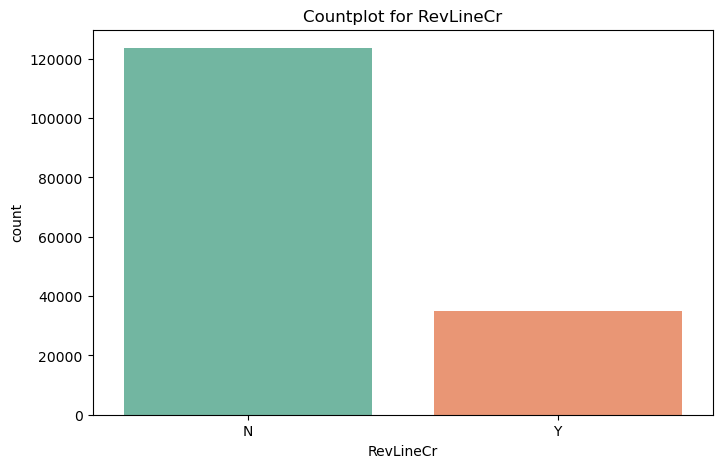

MIS_Status:
 MIS_Status
P I F     131264
CHGOFF     27319
Name: count, dtype: int64


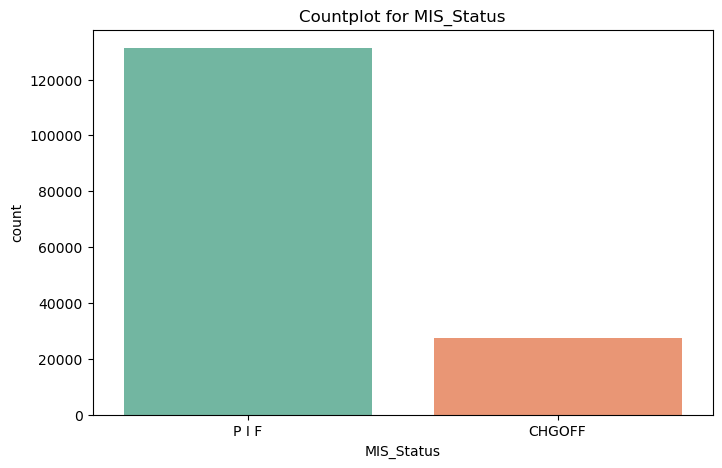

UrbanRural:
 UrbanRural
Urban    93923
Rural    64660
Name: count, dtype: int64


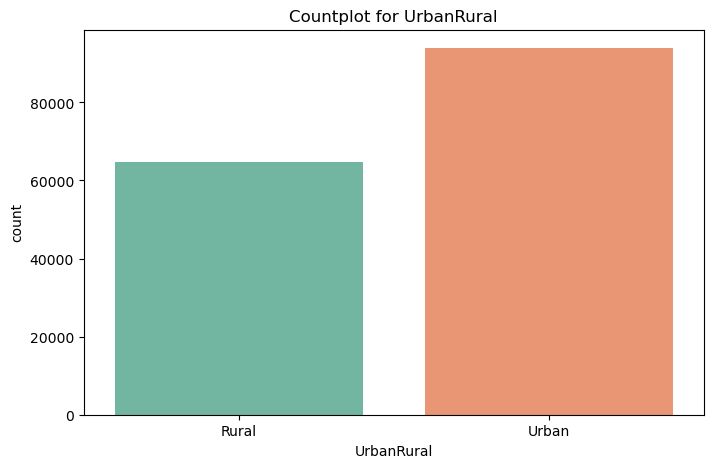

NewExist:
 NewExist
1    114978
2     43605
Name: count, dtype: int64


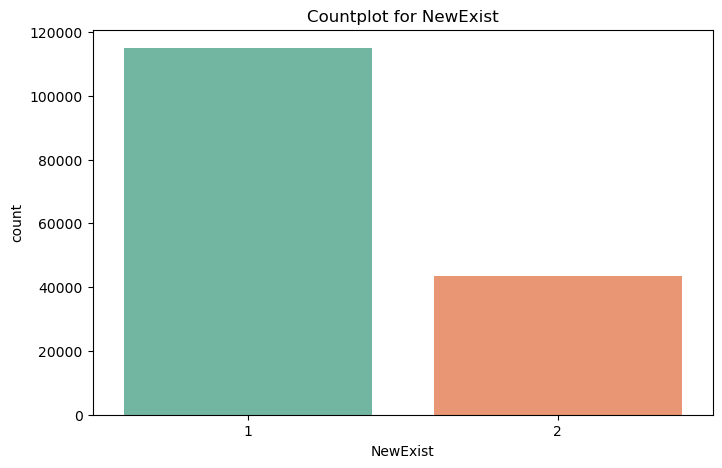

RealEstate:
 RealEstate
0    130911
1     27672
Name: count, dtype: int64


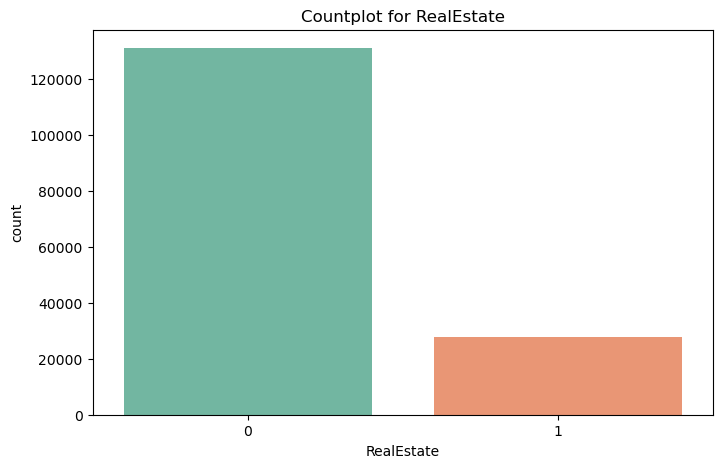

In [357]:
# Categorical EDA

for feature in categorical_features:
    print(f"{feature}:\n", data[feature].value_counts())

    plt.figure(figsize=(8, 5))  # Set figure size
    sns.countplot(x=feature, data=data,palette = 'Set2')
    plt.title(f"Countplot for {feature}")

    plt.show()  
    plt.close()  

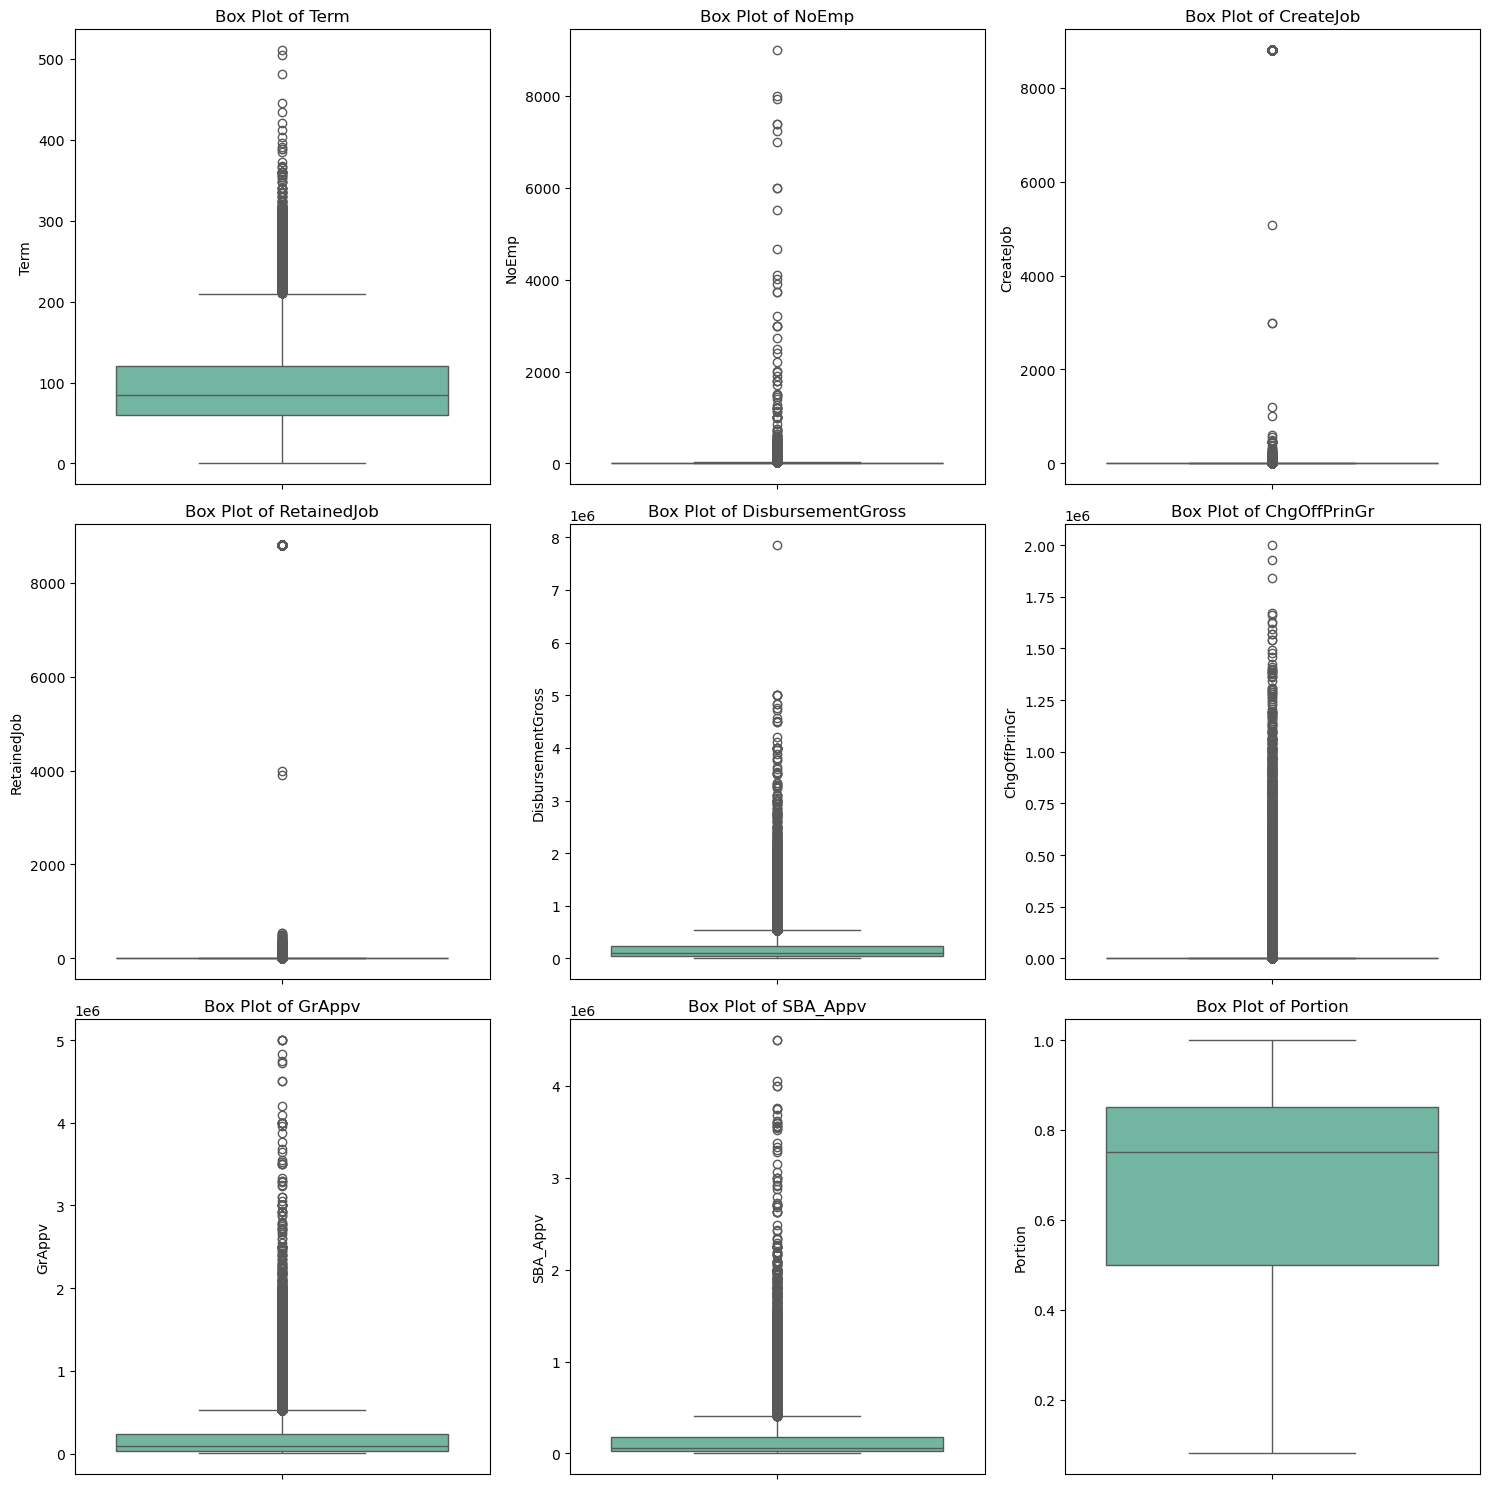

In [358]:
# numerical feature

# Define number of numerical features
num_features = len(numerical_features)

# Calculate required rows and columns for subplots
rows = (num_features // 3) + (num_features % 3 > 0)  # Round up
cols = min(3, num_features)  # Max 3 columns

# Create subplots dynamically
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()  # Flatten in case of multiple rows

# Loop through numerical features and plot boxplots
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=data[feature], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_ylabel(feature)

# Hide any extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Most of the datasets exhibit a highly skewed distribution with a large number of outliers.<br>
The median values for many datasets are close to 0, indicating that a significant portion of the data points are low values.<br>
The presence of numerous outliers suggests that a small number of data points have extremely high values, which could significantly impact the mean and standard deviation of these datasets.<br>
The "Portion" dataset appears to be the most symmetric and has the fewest outliers, indicating a more balanced distribution compared to the others.

### Histogram for skewness

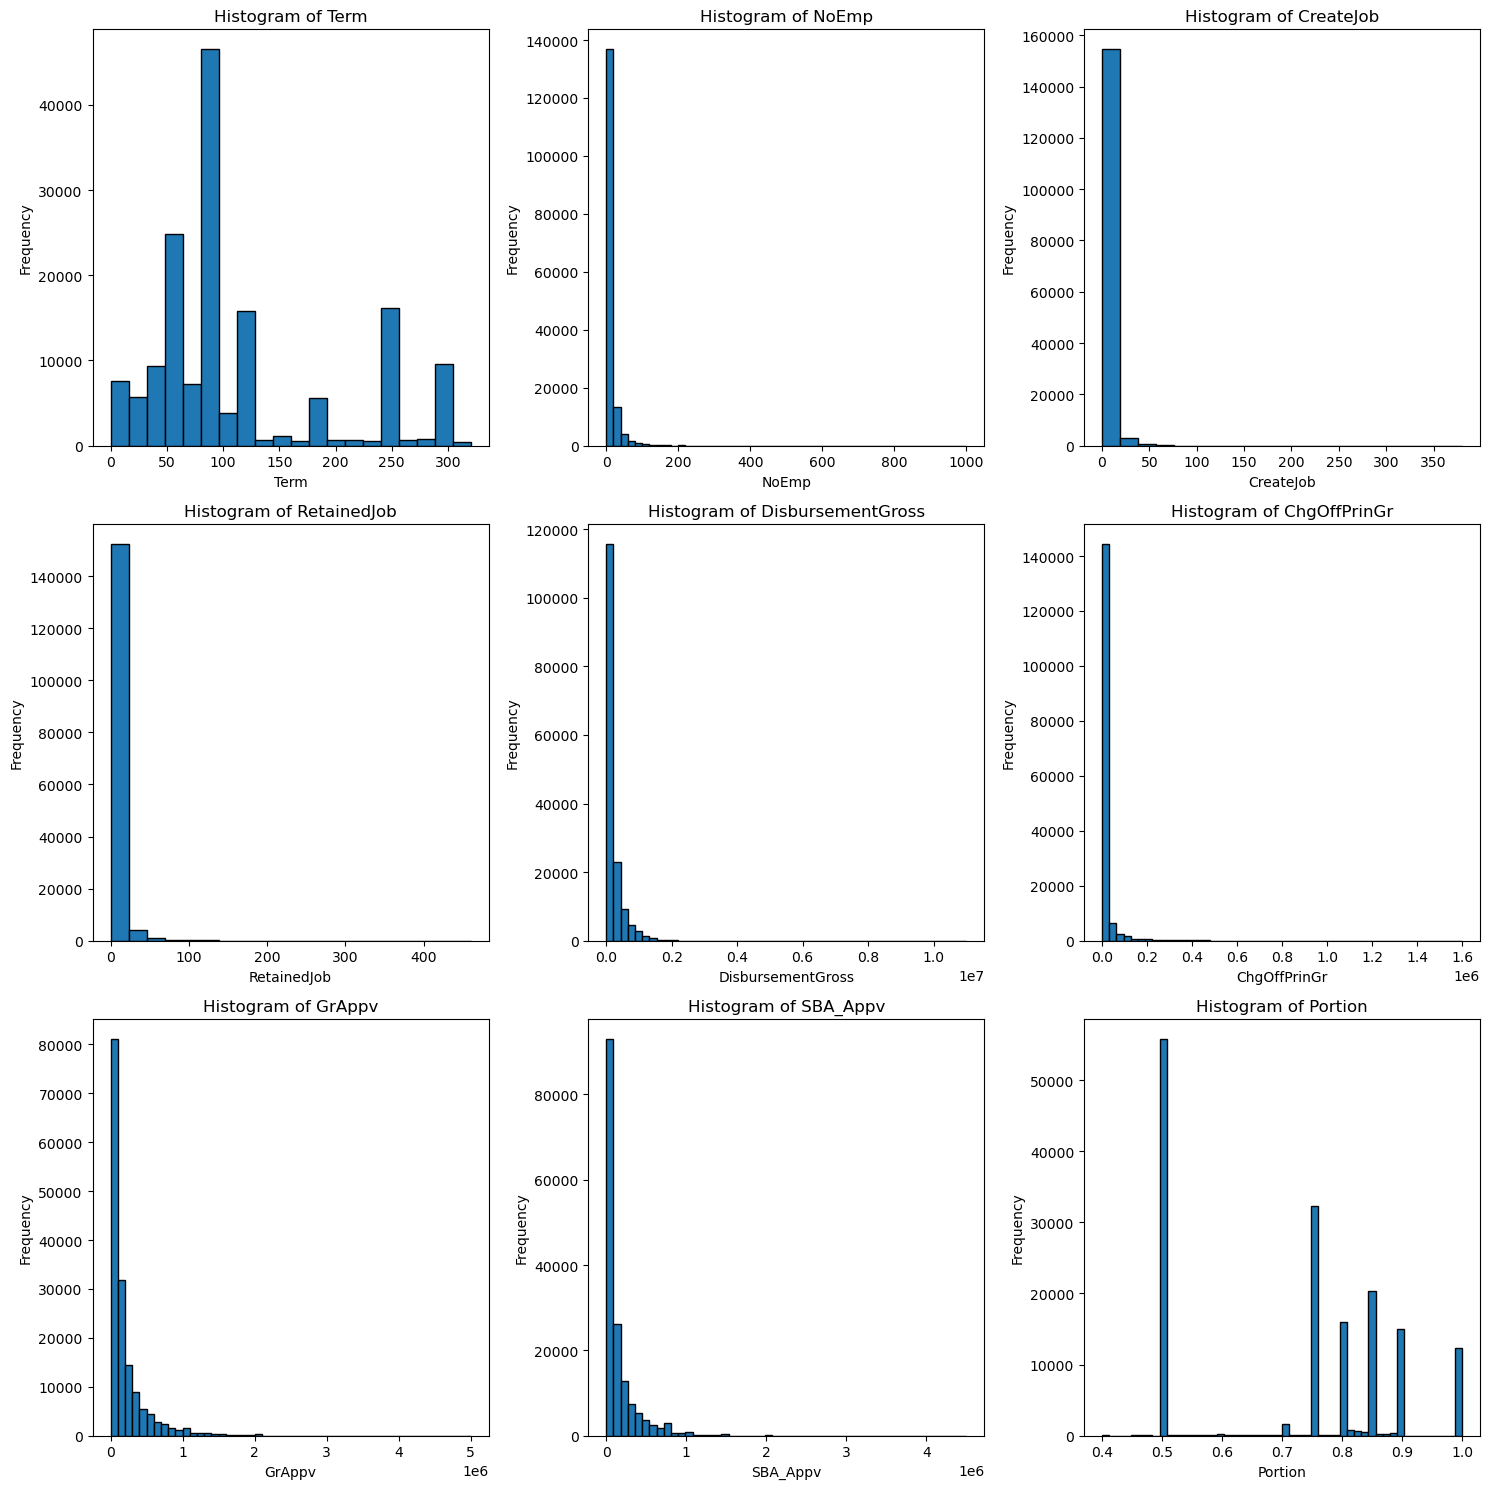

In [359]:
# Define bin ranges for each feature

bin_ranges = {
    'Term': (0, 320, 20),
    'GrAppv': (0, 5000000, 50),
    'SBA_Appv': (0, 4500000, 50),
    'ChgOffPrinGr': (0, 1600000, 50),
    'DisbursementGross': (0, 11000000, 50),
    'NoEmp': (0, 1000, 50),
    'CreateJob': (0, 380, 20),
    'RetainedJob': (0, 460, 20),  
    'Portion': (0.4, 1.0, 50)  
}

# Ensure all numerical features are included
num_features = len(numerical_features)

# Calculate required rows and columns dynamically
cols = 3  # Fixed 3 columns
rows = (num_features // cols) + (num_features % cols > 0)  # Round up to fit all features

# Create subplots dynamically
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()  # Flatten for easy iteration

# Loop through each numerical feature and plot histogram
for i, feature in enumerate(numerical_features):
    bin_range = bin_ranges.get(feature, (0, 100, 10))  # Default bin range if missing
    axes[i].hist(data[feature], bins=bin_range[2], range=bin_range[:2], edgecolor='black')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any extra empty subplots (if features < total subplots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Histogram of Term:**
The distribution is multimodal with peaks around 0, 100, and 250.
This suggests that the term lengths are clustered around these values.

**GrAppv:**
Highly right-skewed with most values close to 0.
Indicates that the majority of the data points have low values, with few outliers.

**SBA_Appv:**
Similar to GrAppv, highly right-skewed with most values close to 0.
Suggests a similar distribution pattern with few high values.

**ChgOffPrinGr:**
Most values are close to 0, indicating minimal changes in the principal amount for most data points.

**DisbursementGross:**
Highly right-skewed with most values close to 0.
Indicates that most disbursements are low, with few high disbursements.

**NoEmp:**
Highly right-skewed with most values close to 0.
Suggests that most data points have a low number of employees.

**CreateJob:**
Most values are close to 0, indicating minimal job creation for most data points.

**RetainedJob:**
Highly right-skewed with most values close to 0.
Indicates that most data points have retained a low number of jobs.

**Portion:**
Bimodal distribution with peaks around 0 and 1.
Suggests that the data is clustered around these two values.
ta is clustered around these two values.
lustered around these two values.

 Most variables are right-skewed, indicating that the majority of the data points have low values with few high outliers.

## Bivariate Analysis

In [360]:
# sns.pairplot(data=numerical_cols, diag_kind='kde')
# plt.show()

**Distribution:**

Most variables are right-skewed, indicating that the majority of the data points have low values with few high outliers.<br>
The "Portion" variable is bimodal. <br>

**Relationships:**

Strong positive relationships between GrAppv and SBA_Appv, and between these variables and DisbursementGross. <br>
Moderate positive relationships between Term and Portion, and between Term and GrAppv/SBA_Appv. <br>
Weak positive relationships between NoEmp and CreateJob/RetainedJob.
ob.
br>
Job.

## Pearson Correlation

In [361]:
correlation_matrix = data[numerical_features].corr()
correlation_matrix

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,Portion
Term,1.000000,0.049908,0.027160,0.024623,0.477011,-0.052320,0.507934,0.531535,0.428073
NoEmp,0.049908,1.000000,0.007042,0.017344,0.090783,0.012207,0.092296,0.095609,0.050667
CreateJob,0.027160,0.007042,1.000000,0.995796,0.005999,0.008808,0.007325,0.013174,0.042355
RetainedJob,0.024623,0.017344,0.995796,1.000000,0.008662,0.011851,0.009398,0.013791,0.035626
DisbursementGross,0.477011,0.090783,0.005999,0.008662,1.000000,0.186572,0.977549,0.945894,0.203176
ChgOffPrinGr,-0.052320,0.012207,0.008808,0.011851,0.186572,1.000000,0.186597,0.160323,-0.020504
GrAppv,0.507934,0.092296,0.007325,0.009398,0.977549,0.186597,1.000000,0.973542,0.249772
SBA_Appv,0.531535,0.095609,0.013174,0.013791,0.945894,0.160323,0.973542,1.000000,0.349151
Portion,0.428073,0.050667,0.042355,0.035626,0.203176,-0.020504,0.249772,0.349151,1.000000


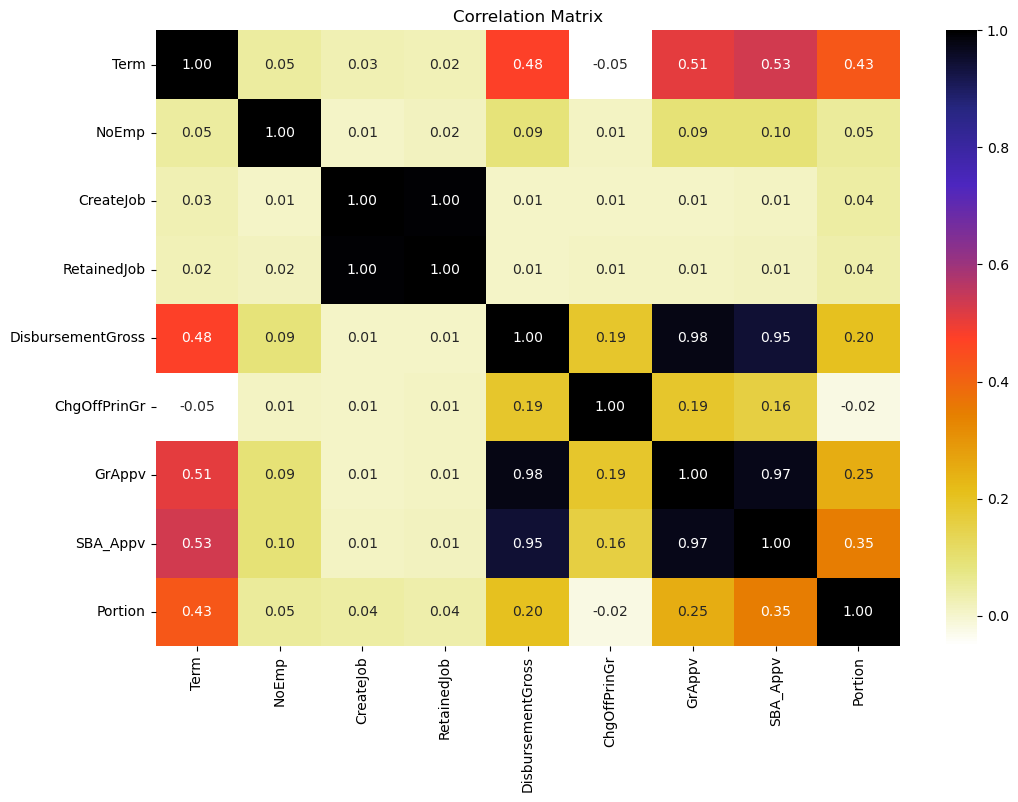

In [362]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

 There are strong positive correlations between GrAppv, disbursementgross and SBA_Appv, and moderate correlations between Term, DisbursementGross, and Portion. Other variables show weak or no significant correlations.

In [363]:
def separate_highly_correlated_features(df, threshold=0.8):
    # Calculate absolute correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of the correlation matrix (excluding diagonal)
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find feature pairs with correlation greater than threshold
    highly_correlated_pairs = [(col1, col2) for col1 in upper_triangle.columns 
                               for col2 in upper_triangle.index if upper_triangle.loc[col1, col2] > threshold]

    # Extract all correlated features
    correlated_features = set([feature for pair in highly_correlated_pairs for feature in pair])

    # Identify uncorrelated features
    uncorrelated_features = [feature for feature in df.columns if feature not in correlated_features]

    return highly_correlated_pairs, uncorrelated_features

# Run function on numerical features
high_corr_features, uncorrelated_features = separate_highly_correlated_features(data[numerical_features])

# Output results
high_corr_features, uncorrelated_features

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

([('CreateJob', 'RetainedJob'),
  ('DisbursementGross', 'GrAppv'),
  ('DisbursementGross', 'SBA_Appv'),
  ('GrAppv', 'SBA_Appv')],
 ['Term', 'NoEmp', 'ChgOffPrinGr', 'Portion'])

Clearly 'GrAppv', 'SBA_Appv', 'DisbursementGross have high correlation and might add multicollinearity in our model, it would be wise to drop 2 out of 3 of those columns. We already have a column Portion which was derived from 'GrAppv' and 'SBA_Appv', so we can drop one of those two.',

In [364]:
columns_to_drop = ['SBA_Appv', 'DisbursementGross']
data = data.drop(columns=columns_to_drop)

In [365]:
data.head(3)

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,MIS_Status,ChgOffPrinGr,GrAppv,Portion,RealEstate
614156,84,2,2,0,0,Rural,N,P I F,0.0,225000.0,0.85,0
837937,12,3,1,0,0,Urban,N,P I F,0.0,1000000.0,0.75,0
766128,60,3,2,0,0,Rural,N,P I F,0.0,30800.0,0.83,0


In [366]:
# Log transform highly skewed features

log_transformed_features = ['GrAppv', 'ChgOffPrinGr']
for feature in log_transformed_features:
    data[f'{feature}_log'] = np.log1p(data[feature])

# Square root transform moderately skewed features
sqrt_transformed_features = ['NoEmp', 'CreateJob', 'RetainedJob']
for feature in sqrt_transformed_features:
    data[f'{feature}_sqrt'] = np.sqrt(data[feature])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [367]:
data[['NoEmp', 'CreateJob', 'RetainedJob']].describe()

,NoEmp,CreateJob,RetainedJob
count,158583.000000,158583.000000,158583.000000
mean,11.620609,9.113953,11.321491
std,71.403868,248.638404,248.562569
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000
75%,10.000000,1.000000,4.000000
max,9000.000000,8800.000000,8800.000000


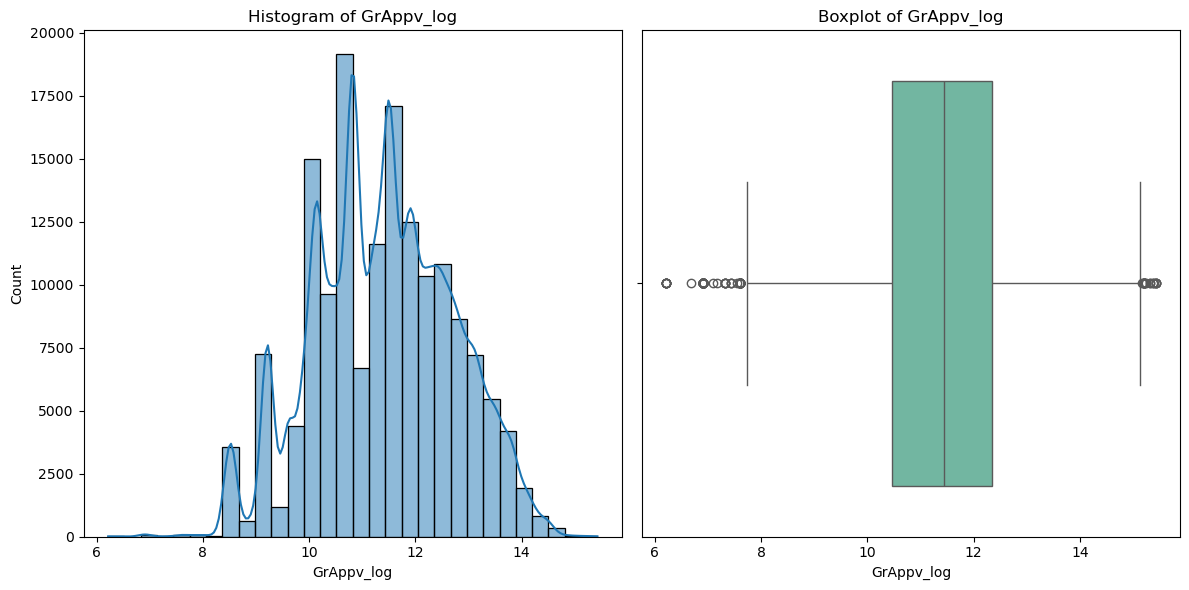

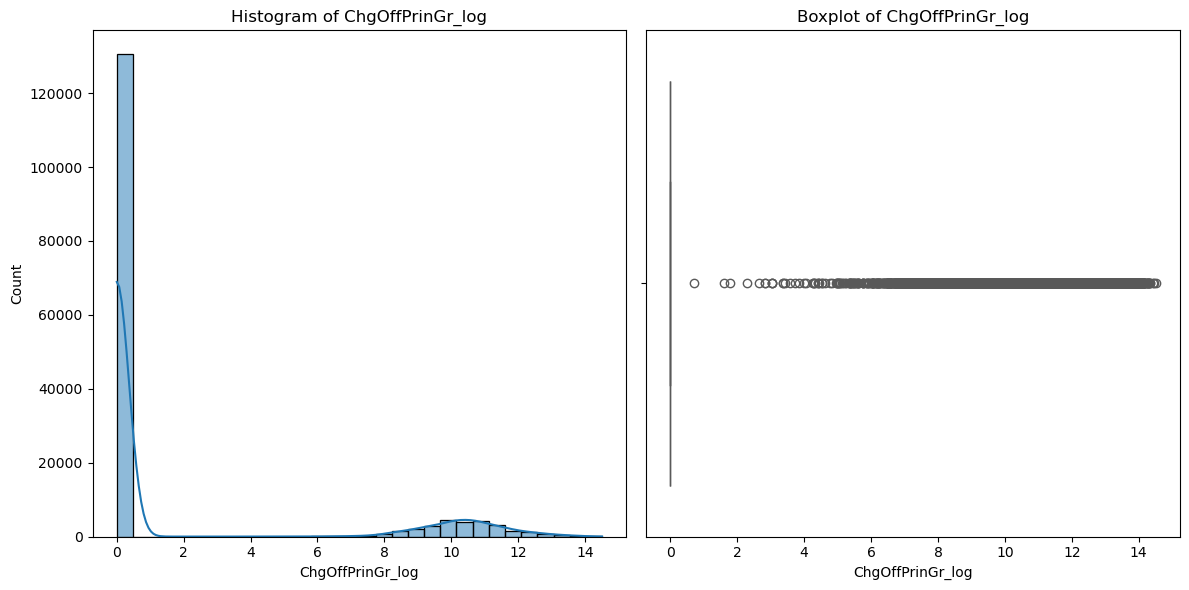

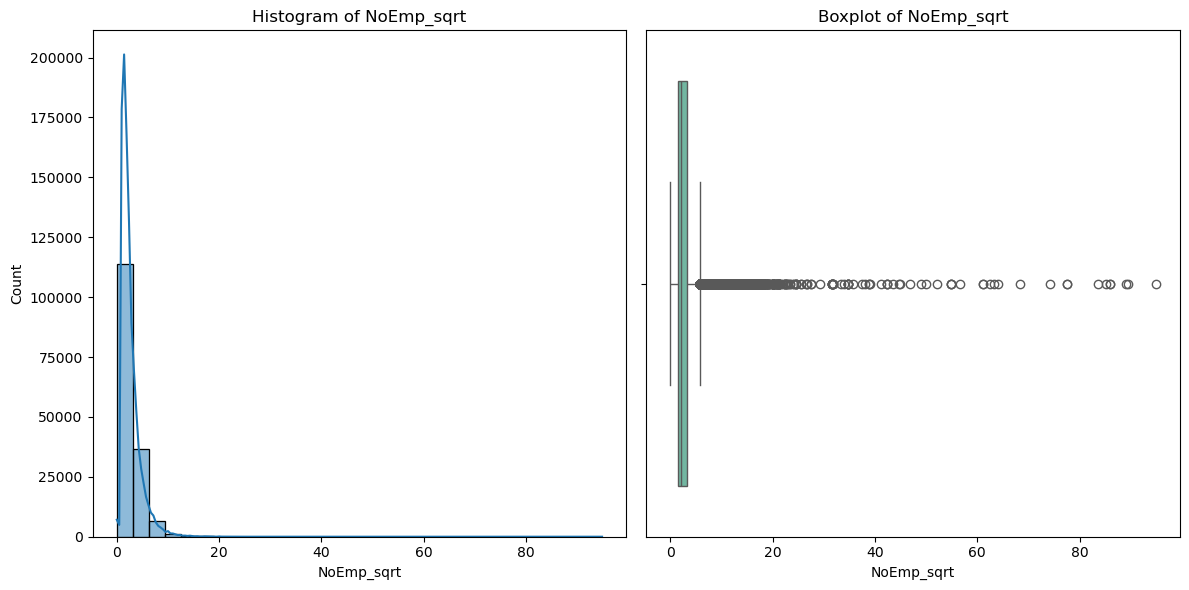

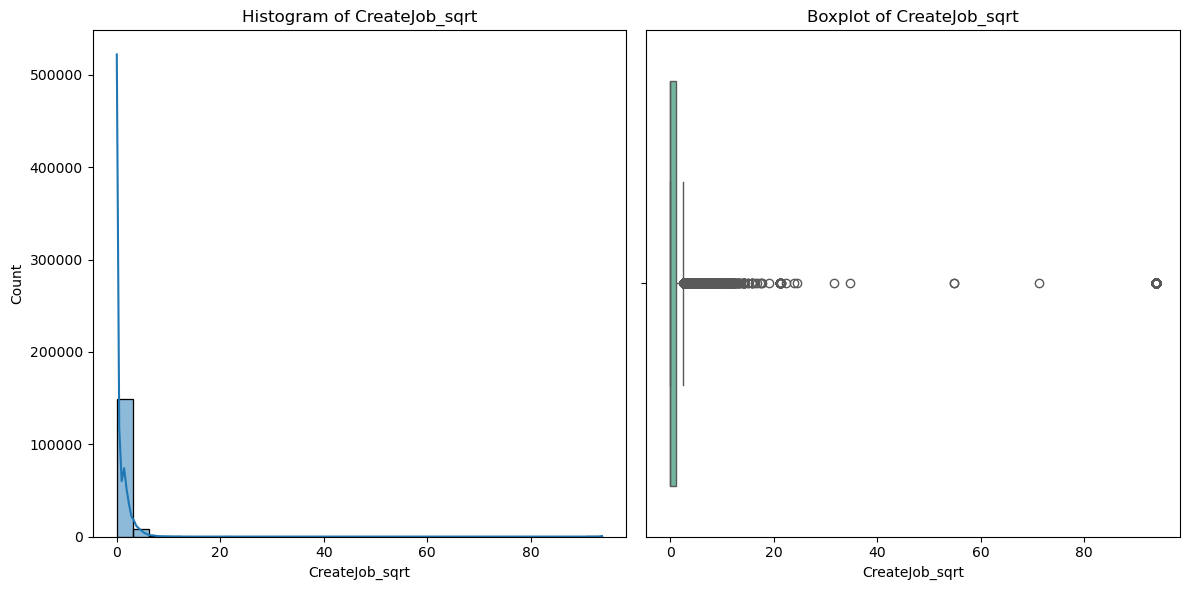

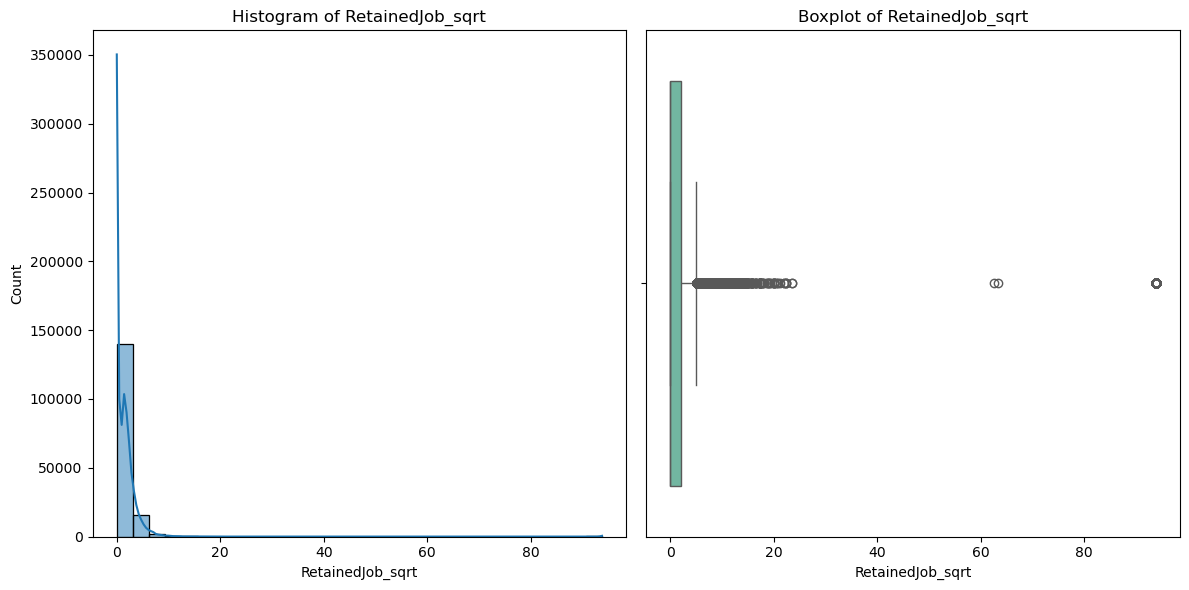

In [368]:
transformed_features = [f'{feature}_log' for feature in log_transformed_features] + \
                       [f'{feature}_sqrt' for feature in sqrt_transformed_features]

for feature in transformed_features:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f"Histogram of {feature}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[feature],palette='Set2')
    plt.title(f"Boxplot of {feature}")

    # Adjust layout to avoid overlapping
    plt.tight_layout()
    plt.show()

**Skewness:** All variables except GrAppv_log show right-skewed distributions, with most data points concentrated near zero.<br>
**Outliers:** Createjob_sqrt, NoEmp_sqrt, and Retainedjob_sqrt have significant outliers, indicating the presence of extreme values.<br>
**Central Tendency:** The medians for Createjob_sqrt, NoEmp_sqrt, and Retainedjob_sqrt are close to zero, while GrAppv_log has a median around 11.<br>
**Spread:** The IQRs for Createjob_sqrt, NoEmp_sqrt, and Retainedjob_sqrt are small, indicating that most data points are clustered around lower values. GrAppv_log has a wider IQR, indicating more spread in the data.<br>
These observations suggest that the variables Createjob_sqrt, NoEmp_sqrt, and Retainedjob_sqrt may require transformation or normalization.

In [369]:
data.head(3)

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,MIS_Status,ChgOffPrinGr,GrAppv,Portion,RealEstate,GrAppv_log,ChgOffPrinGr_log,NoEmp_sqrt,CreateJob_sqrt,RetainedJob_sqrt
614156,84,2,2,0,0,Rural,N,P I F,0.0,225000.0,0.85,0,12.323860,0.0,1.414214,0.0,0.0
837937,12,3,1,0,0,Urban,N,P I F,0.0,1000000.0,0.75,0,13.815512,0.0,1.732051,0.0,0.0
766128,60,3,2,0,0,Rural,N,P I F,0.0,30800.0,0.83,0,10.335302,0.0,1.732051,0.0,0.0


In [370]:
data = data.drop(columns=['GrAppv', 'ChgOffPrinGr', 'NoEmp', 'CreateJob', 'RetainedJob'])

In [371]:
data.head(2)

,Term,NewExist,UrbanRural,RevLineCr,MIS_Status,Portion,RealEstate,GrAppv_log,ChgOffPrinGr_log,NoEmp_sqrt,CreateJob_sqrt,RetainedJob_sqrt
614156,84,2,Rural,N,P I F,0.85,0,12.323860,0.0,1.414214,0.0,0.0
837937,12,1,Urban,N,P I F,0.75,0,13.815512,0.0,1.732051,0.0,0.0


In [372]:
numerical_features = ['Term', 'GrAppv_log', 'ChgOffPrinGr_log', 'NoEmp_sqrt', 'CreateJob_sqrt', 'RetainedJob_sqrt', 'Portion']
categorical_features = ['RevLineCr', 'MIS_Status', 'UrbanRural', 'NewExist', 'RealEstate']

## One-Way Anova

In [373]:
from scipy.stats import f_oneway

# Function to perform ANOVA for each numerical feature vs each categorical feature
def perform_anova(df, numerical_features, categorical_features):
    results = {}
    
    for cat_feature in categorical_features:
        for num_feature in numerical_features:
            # Create groups for the ANOVA
            groups = [df[df[cat_feature] == category][num_feature].dropna() for category in df[cat_feature].unique()]
            
            # Perform one-way ANOVA
            f_stat, p_val = f_oneway(*groups)
            
            # Store the results
            results[f"{num_feature} ~ {cat_feature}"] = {'F-Statistic': f_stat, 'p-value': p_val}
    
    return pd.DataFrame(results).T

# Perform ANOVA on each combination of numerical and categorical feature
anova_results = perform_anova(data, numerical_features, categorical_features)

# Filter for significant results (p-value < 0.05)
significant_results = anova_results[anova_results['p-value'] < 0.05]

# Display results
# print(anova_results)
print("\nSignificant results (p-value < 0.05):")
print(significant_results)

<IPython.core.display.Javascript object>


Significant results (p-value < 0.05):
                                F-Statistic        p-value
Term ~ RevLineCr               1.998139e+04   0.000000e+00
GrAppv_log ~ RevLineCr         2.961612e+04   0.000000e+00
ChgOffPrinGr_log ~ RevLineCr   1.764115e+03   0.000000e+00
NoEmp_sqrt ~ RevLineCr         2.818339e+03   0.000000e+00
CreateJob_sqrt ~ RevLineCr     6.749847e+01   2.124153e-16
RetainedJob_sqrt ~ RevLineCr   1.973600e+03   0.000000e+00
Portion ~ RevLineCr            1.003374e+05   0.000000e+00
Term ~ MIS_Status              1.746789e+04   0.000000e+00
GrAppv_log ~ MIS_Status        5.662844e+03   0.000000e+00
ChgOffPrinGr_log ~ MIS_Status  2.788475e+06   0.000000e+00
NoEmp_sqrt ~ MIS_Status        1.770687e+03   0.000000e+00
CreateJob_sqrt ~ MIS_Status    4.148433e+01   1.191577e-10
RetainedJob_sqrt ~ MIS_Status  5.583808e+02  3.094464e-123
Portion ~ MIS_Status           5.361700e+03   0.000000e+00
Term ~ UrbanRural              1.053875e+04   0.000000e+00
GrAppv_log ~ Urba

Extremely Strong Relationships: These are characterized by very high F-statistics (often in the thousands) and p-values that are practically zero. These indicate that the independent variable (e.g., RealEstate, RevLineCr) has a very strong influence on the dependent variable (e.g., Term, Portion), with clear and distinct differences between the groups.

Moderate but Significant Relationships: These have lower F-statistics (often in the single to low double digits) and p-values that are still below the 0.05 threshold. These indicate that the independent variable has a significant influence on the dependent variable, but the effect is not as strong. The differences between groups are still notable but less pronounced.

## One Hot encoding

The categorical features "RevLineCr," "MIS_Status," "UrbanRural," "NewExist," and "RealEstate" all have binary values. Let us use One Hot Encoding to convert them.

In [374]:
data.head(2)

,Term,NewExist,UrbanRural,RevLineCr,MIS_Status,Portion,RealEstate,GrAppv_log,ChgOffPrinGr_log,NoEmp_sqrt,CreateJob_sqrt,RetainedJob_sqrt
614156,84,2,Rural,N,P I F,0.85,0,12.323860,0.0,1.414214,0.0,0.0
837937,12,1,Urban,N,P I F,0.75,0,13.815512,0.0,1.732051,0.0,0.0


In [375]:
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

<IPython.core.display.Javascript object>

In [376]:
data.head(3)

,Term,Portion,GrAppv_log,ChgOffPrinGr_log,NoEmp_sqrt,CreateJob_sqrt,RetainedJob_sqrt,RevLineCr_Y,MIS_Status_P I F,UrbanRural_Urban,NewExist_2,RealEstate_1
614156,84,0.85,12.323860,0.0,1.414214,0.0,0.0,False,True,False,True,False
837937,12,0.75,13.815512,0.0,1.732051,0.0,0.0,False,True,True,False,False
766128,60,0.83,10.335302,0.0,1.732051,0.0,0.0,False,True,False,True,False


In [377]:
new_column_names = {
    'RevLineCr_Y': 'RevLineCr',
    'MIS_Status_P I F': 'MIS_Status',
    'UrbanRural_Urban': 'UrbanRural',
    'NewExist_2': 'NewExist',
    'RealEstate_1': 'RealEstate'
}

# Rename the columns
data.rename(columns=new_column_names, inplace=True)

data[categorical_features] = data[categorical_features].astype(int)
data.head(5)

,Term,Portion,GrAppv_log,ChgOffPrinGr_log,NoEmp_sqrt,CreateJob_sqrt,RetainedJob_sqrt,RevLineCr,MIS_Status,UrbanRural,NewExist,RealEstate
614156,84,0.85,12.323860,0.0,1.414214,0.0,0.0,0,1,0,1,0
837937,12,0.75,13.815512,0.0,1.732051,0.0,0.0,0,1,1,0,0
766128,60,0.83,10.335302,0.0,1.732051,0.0,0.0,0,1,0,1,0
214921,60,0.75,10.819798,0.0,1.732051,0.0,0.0,0,1,0,0,0
335738,60,0.50,10.126671,0.0,1.414214,0.0,0.0,1,1,1,0,0


### Model Building

In [378]:
# Importing libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Use Logistic Regression for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


### Splitting data into train and test

In [379]:
X = data.drop(columns=['MIS_Status'])
y = data['MIS_Status']

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


train_df = X_train.copy()
train_df['MIS_Status'] = y_train.values  

test_df = X_test.copy()
test_df['MIS_Status'] = y_test.values  


print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Training set shape: (126866, 12)
Test set shape: (31717, 12)


In [381]:
# Feature importance check

model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importances)

<IPython.core.display.Javascript object>

             Feature  Importance
3   ChgOffPrinGr_log    0.795326
0               Term    0.134125
2         GrAppv_log    0.016576
8         UrbanRural    0.013227
6   RetainedJob_sqrt    0.013010
10        RealEstate    0.007953
1            Portion    0.006560
4         NoEmp_sqrt    0.006295
5     CreateJob_sqrt    0.003425
7          RevLineCr    0.001774
9           NewExist    0.001729


In [382]:
# Drop least importance columns

data = data.drop(columns=['RevLineCr', 'NewExist'])

In [383]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [384]:
X = data.drop(columns=['MIS_Status'])
y = data['MIS_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


train_df = X_train.copy()
train_df['MIS_Status'] = y_train.values  

test_df = X_test.copy()
test_df['MIS_Status'] = y_test.values  

# Print dataset shapes
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Training set shape: (126866, 10)
Test set shape: (31717, 10)


### Logistic Regression

In [385]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [408]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5464
           1       1.00      0.99      1.00     26253

    accuracy                           0.99     31717
   macro avg       0.98      0.99      0.99     31717
weighted avg       0.99      0.99      0.99     31717



The logistic regression model demonstrates exceptional performance after dropping the UrbanRural and NewExist features. The high precision, recall, and F1-scores for both classes indicate that the model is highly effective in classifying instances accurately. This suggests that the retained features are sufficient for making accurate predictions, and the model is well-optimized.

### Confusion Matrix

In [387]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 5434    30]
 [  191 26062]]


True Positives (TP): 26062
These are the cases where the actual class is positive (1), and the model correctly predicted it as positive.<br>
True Negatives (TN): 5434
These are the cases where the actual class is negative (0), and the model correctly predicted it as negative.<br>
False Positives (FP): 30
These are the cases where the actual class is negative (0), but the model incorrectly predicted it as positive. In this case, there are no false positives.<br>
False Negatives (FN): 191
These are the cases where the actual class is positive (1), but the model incorrectly predicted it as neative.
ative.

### Random Forest Classifier

In [414]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5464
           1       1.00      0.99      1.00     26253

    accuracy                           0.99     31717
   macro avg       0.98      0.99      0.99     31717
weighted avg       0.99      0.99      0.99     31717



### Cross Validation

In [389]:
from sklearn.model_selection import cross_val_score

In [410]:
model = RandomForestClassifier(random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # cv=5 indicates 5-fold cross-validation

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.99270907 0.99385173 0.99160525 0.99286643 0.99393056]
Average Cross-Validation Score: 0.9929926086070052


### Naive Bayes Classifier

In [411]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5464
           1       1.00      0.99      1.00     26253

    accuracy                           0.99     31717
   macro avg       0.98      0.99      0.99     31717
weighted avg       0.99      0.99      0.99     31717



### XGBoost Classifier

In [412]:
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5464
           1       1.00      0.99      1.00     26253

    accuracy                           0.99     31717
   macro avg       0.98      0.99      0.99     31717
weighted avg       0.99      0.99      0.99     31717



### Catboost Classifier

In [393]:
from catboost import CatBoostClassifier
# Train the CatBoost classifier
catboost_classifier = CatBoostClassifier(verbose=0)
catboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = catboost_classifier.predict(X_test)
y_proba = catboost_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5464
           1       1.00      0.99      1.00     26253

    accuracy                           0.99     31717
   macro avg       0.98      0.99      0.99     31717
weighted avg       0.99      0.99      0.99     31717



### KNN Classifier

In [394]:
from sklearn.neighbors import KNeighborsClassifier
# Train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)
y_proba = knn_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5464
           1       1.00      0.99      1.00     26253

    accuracy                           0.99     31717
   macro avg       0.98      0.99      0.99     31717
weighted avg       0.99      0.99      0.99     31717



In [418]:
import pickle

model = RandomForestClassifier()
model.fit(X_train, y_train)

filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [419]:
filename = 'model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

## Function to predict loan approval

In [420]:
def predict_loan_approval(model, input_data):
    # Define the columns based on your feature names
    columns = ['Term', 'Portion', 'GrAppv_log', 'ChgOffPrinGr_log', 'NoEmp_sqrt', 'CreateJob_sqrt', 'RetainedJob_sqrt', 'UrbanRural', 'RealEstate']

    # Create a DataFrame from the input data
    input_df = pd.DataFrame([input_data], columns=columns)

    # Make a prediction using the model
    prediction = model.predict(input_df)

    # Return the loan status based on the prediction
    if prediction == 1:
        return "Loan Approved"
    else:
        return "Loan Not Approved"

# Example input data
input_data = {
    'Term': 36,                  # Loan Term in months
    'Portion': 0.5,              # Example value for Portion
    'GrAppv_log': 11.4006,       # Log of Grant Approved Amount (log(90000))
    'ChgOffPrinGr_log': 12.0,    # Log of Charged Off Principal
    'NoEmp_sqrt': 4,             # Square Root of Number of Employees
    'CreateJob_sqrt': 3,         # Square Root of Jobs Created
    'RetainedJob_sqrt': 2,       # Square Root of Jobs Retained
    'UrbanRural': 1,              
    'RealEstate': 1              # Real Estate involvement (example value)
}

# Assuming 'model' is your trained Random Forest model
loan_status = predict_loan_approval(model, input_data)
print(loan_status)

<IPython.core.display.Javascript object>

Loan Not Approved


In [421]:
# Further adjusted input data for probable loan approval
input_data_further_adjusted = {
    'Term': 12,                   # Further reduced Loan Term in months
    'Portion': 0.7,               # Further adjusted example value for Portion
    'GrAppv_log': 14.0,           # Further increased Log of Grant Approved Amount
    'ChgOffPrinGr_log': 1.0,     # Further decreased Log of Charged Off Principal
    'NoEmp_sqrt': 7.0,           # Further increased Square Root of Number of Employees
    'CreateJob_sqrt': 6.0,        # Further increased Square Root of Jobs Created
    'RetainedJob_sqrt': 5.0,      # Further increased Square Root of Jobs Retained
    'UrbanRural': 0,           
    'RealEstate': 1               # Real Estate involvement (example value)
}

# Predict loan approval with further adjusted input data
loan_status_further_adjusted = predict_loan_approval(model, input_data_further_adjusted)
print(loan_status_further_adjusted)

<IPython.core.display.Javascript object>

Loan Approved
